# Python and Pandas exercises

This notebook contains the code from the live demo on Python and Pandas data exploration

Useful keyboard shortcuts for Jupyter notebooks (Windows):

- `Shift + Enter` run the current cell, select below
- `Ctrl + S` save and checkpoint

Mac: 
- `Ctrl`: `command key ⌘`

Notebooks support tab completion and allow you to see documentation by pressing `shift + tab` inside a function. Hitting `tab` twice will expand this. 

Python documentation available [here](https://docs.python.org/3/)  
Numpy documentation available [here](https://docs.scipy.org/doc/numpy-1.15.0/user/index.html)  
Pandas documentation available [here](https://pandas.pydata.org/pandas-docs/version/0.25/)

In [ ]:
#can run bash commands inside a notebook by using !


### Python overview

In [ ]:
#primitive data types - integer, float, boolean, and string
print(type(1))
print(type(2.5))
print(type(True))
print(type('abc'))

In [ ]:
#lists can be collections of different data types - these can be modified
my_list = [1,2,3, 'a']
my_list

In [ ]:
#append to list


In [ ]:
#dictionaries - unordered key-value pairs
my_dict = {'cats':1, 'dogs':3, 'turtles':5}
my_dict

In [ ]:
#reference using a key


In [ ]:
#get list of keys


### Numpy overview

In [ ]:
#numpy is the building block for many packages, looks similar to lists but much more useful for numerical calculations
import numpy as np

In [ ]:
#numpy array
x = np.array([0,1,2,3,4,5])
print(type(x))
print(x)

In [ ]:
#2-D numpy array 
my_matrix = np.array([(1,2,3), (4,5,6), (7,8,9)])
my_matrix

In [ ]:
#numpy random numbers
np.random.random(2)

In [ ]:
#set numpy random seed so numbers are the same


In [ ]:
#create range of numbers
np.arange(2,20,2)

### Pandas overview

[Here](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) is a helpful pdf cheatsheet of many of the pandas commands needed for data wrangling.


*Note*: that there is almost always more than one way to accomplish a task in python and many duplicate methods in pandas. Please feel free to explore different methods on your own.

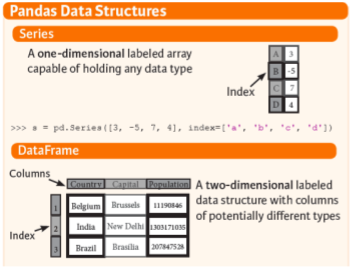

In [ ]:
#pandas
import pandas as pd
my_df = pd.DataFrame({'integers_col': [1,6,2,9,10,12],
                      'timestamps_col': 3* [pd.Timestamp('20130102'), pd.Timestamp.today().date()],
                      'floats_col': pd.Series(1, index=list(range(6)), dtype='float32'),
                      'ints_from_array': np.array([3] * 6, dtype='int32'),
                      'categories_col': pd.Categorical(["test", "train", "test", "train", "train", "train"]),
                      'strings_col': 'foo'})
my_df

In [ ]:
#see first or last rows of data frame


In [ ]:
#see random sample of dataframe


In [ ]:
#see data types of columns
#note that pandas data types are slightly different and objects encompass strings or mixed type columns


In [ ]:
#look at column names


In [ ]:
#see how many columns and rows a dataframe contains


In [ ]:
#look at descriptive statistics of the numerical columns of data frame


In [ ]:
#unique values
my_df['categories_col'].unique()

In [ ]:
#length of something
print(len(my_df['categories_col'].unique()))
my_df['categories_col'].nunique()

In [ ]:
#get min values


In [ ]:
#get max value


#### Modifying Data

In [ ]:
#print out the first few rows of our data frame again
my_df.head(n=3)

In [ ]:
#index values
#iloc gets rows (or columns) at particular positions in the index (so it only takes integers)
#loc gets rows (or columns) with particular labels from the index

print(my_df.iloc[0:3,4])
print(my_df.loc[0:2,['categories_col']])

In [ ]:
#reference specific columns 
my_df[['integers_col', 'strings_col']]

In [ ]:
#filter by value
my_df[my_df['integers_col'] >6]

**Copy vs view**

When you create a view a new array object is created but (and that's important) the View's data pointer points to the original array. Many assignment methods in pandas create views of the original data

In [ ]:
#create another dataframe
another_df = pd.DataFrame({'a':np.arange(4), 'b':np.arange(4)})
another_df

In [ ]:
#create a slice through indexing
my_slice = another_df.iloc[1:3,]
my_slice

In [ ]:
#modify the dataframe
another_df.iloc[1,1] = -1
another_df

In [ ]:
#print the slice to see how it has changed as well


In [ ]:
#replace something
my_new_df = my_df.replace('foo', 'bar')
my_new_df.head()

In [ ]:
#drop columns - note that we're setting inplace = True so that we don't create just a view with the dropped columns
my_new_df.head()
my_new_df.drop(['strings_col'], axis=1, inplace = True)
my_new_df.head()

In [ ]:
#sort by column values
my_df.sort_values(by = "integers_col")

In [ ]:
#create function to multiple a number by 3
def multiply_fun(value):
    new_val = 3.0 * value
    return new_val

In [ ]:
#apply function to column of data
my_df['calculated_data_col'] = my_df['integers_col'].apply(multiply_fun)
my_df.head()

In [ ]:
#output data frame
my_df.to_csv("/mnt/data/demo-notebooks-data/df_output.csv")

In [ ]:
#import data into data frame
imported_df = pd.read_csv("/mnt/data/demo-notebooks-data/df_output.csv")
imported_df.head()

# Part Two

In [ ]:
#plot data - scatter plot
my_df.plot(x = 'integers_col', y = 'calculated_data_col', kind = 'scatter');

In [ ]:
#plot data - line plot


In [ ]:
#value_counts for 'categories_col'
my_df['categories_col'].value_counts()

#### Factorize data

In [ ]:
#factorize data
print(pd.factorize(my_df['categories_col']))

In [ ]:
#assign the output to variables - essentially unpacking the tuple that is output
# the underscore ignores the unneeded values
vals, _ = pd.factorize(my_df['categories_col'])
my_df['factorized_col'] = vals
my_df.head()

#### Merge Tables

In [ ]:
#create two tables - student grades and student class
student_grades = pd.DataFrame({'names': ['John', 'Amy', 'Zach', 'Rebecca'], 'grades':[89, 94, 91, 98]})
student_class = pd.DataFrame({'names': ['Amy', 'Zach', 'John', 'Rebecca'], 'class':['freshman', 'senior', 
                                                                                    'junior', 'freshman']})
#show student grades table
student_grades

In [ ]:
#show student class table
student_class

In [ ]:
#merge the tables together


### Seaborn plotting overview

In [ ]:
import seaborn as sns

In [ ]:
#create boxplot of student grades
sns.boxplot(student_grades['grades']);